# Wine Dataset Exploratory Analysis & Visualization

**Student:** Aryan Dhiman  
**Course:** CSU1658 – Statistical Foundation of Data Sciences  
**Date:** November 2025

---

## Objective

- Display basic statistics
- Boxplot by classes
- Scatterplot between variables
- Co-Variance matrix plot
- Data scaling
- Principal Component Analysis (PCA) for class separation


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1. Load the Wine Dataset and Display Basic Statistics

In [2]:
wine = load_wine(as_frame=True)
df = wine.frame.copy()
df['target'] = wine.target
print("Dataset shape:", df.shape)
df.describe()

Dataset shape: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 2. Boxplot by Output Labels/Classes

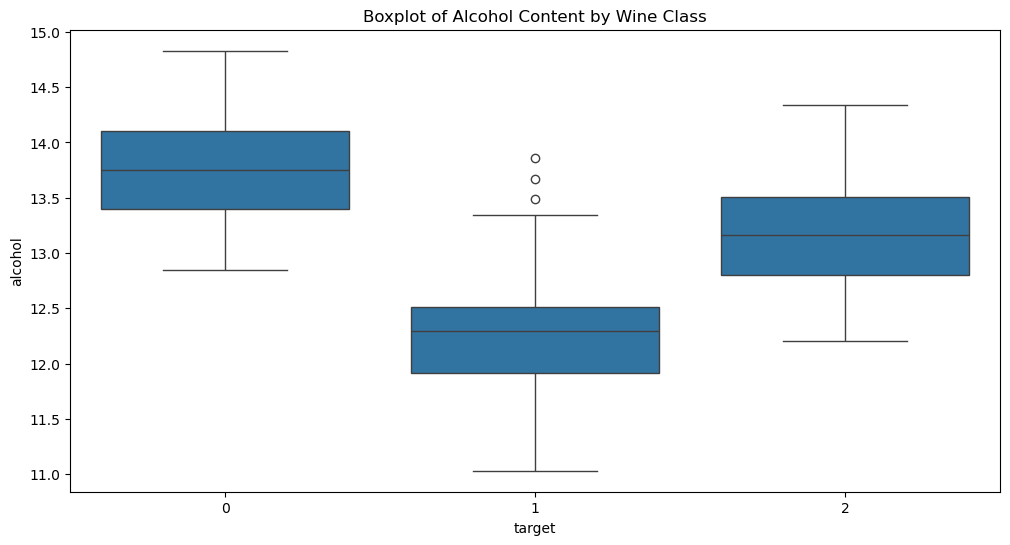

In [3]:
plt.figure(figsize=(12,6))
sns.boxplot(x='target', y='alcohol', data=df)
plt.title("Boxplot of Alcohol Content by Wine Class")
plt.show()

## 3. Scatterplot using Two Variables

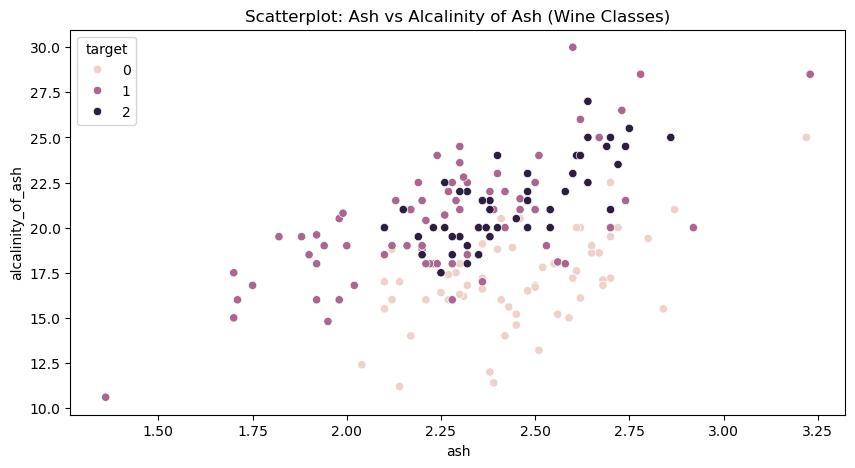

In [4]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ash', y='alcalinity_of_ash', hue='target', data=df)
plt.title('Scatterplot: Ash vs Alcalinity of Ash (Wine Classes)')
plt.show()

## 4. Plot Co-Variance Matrix

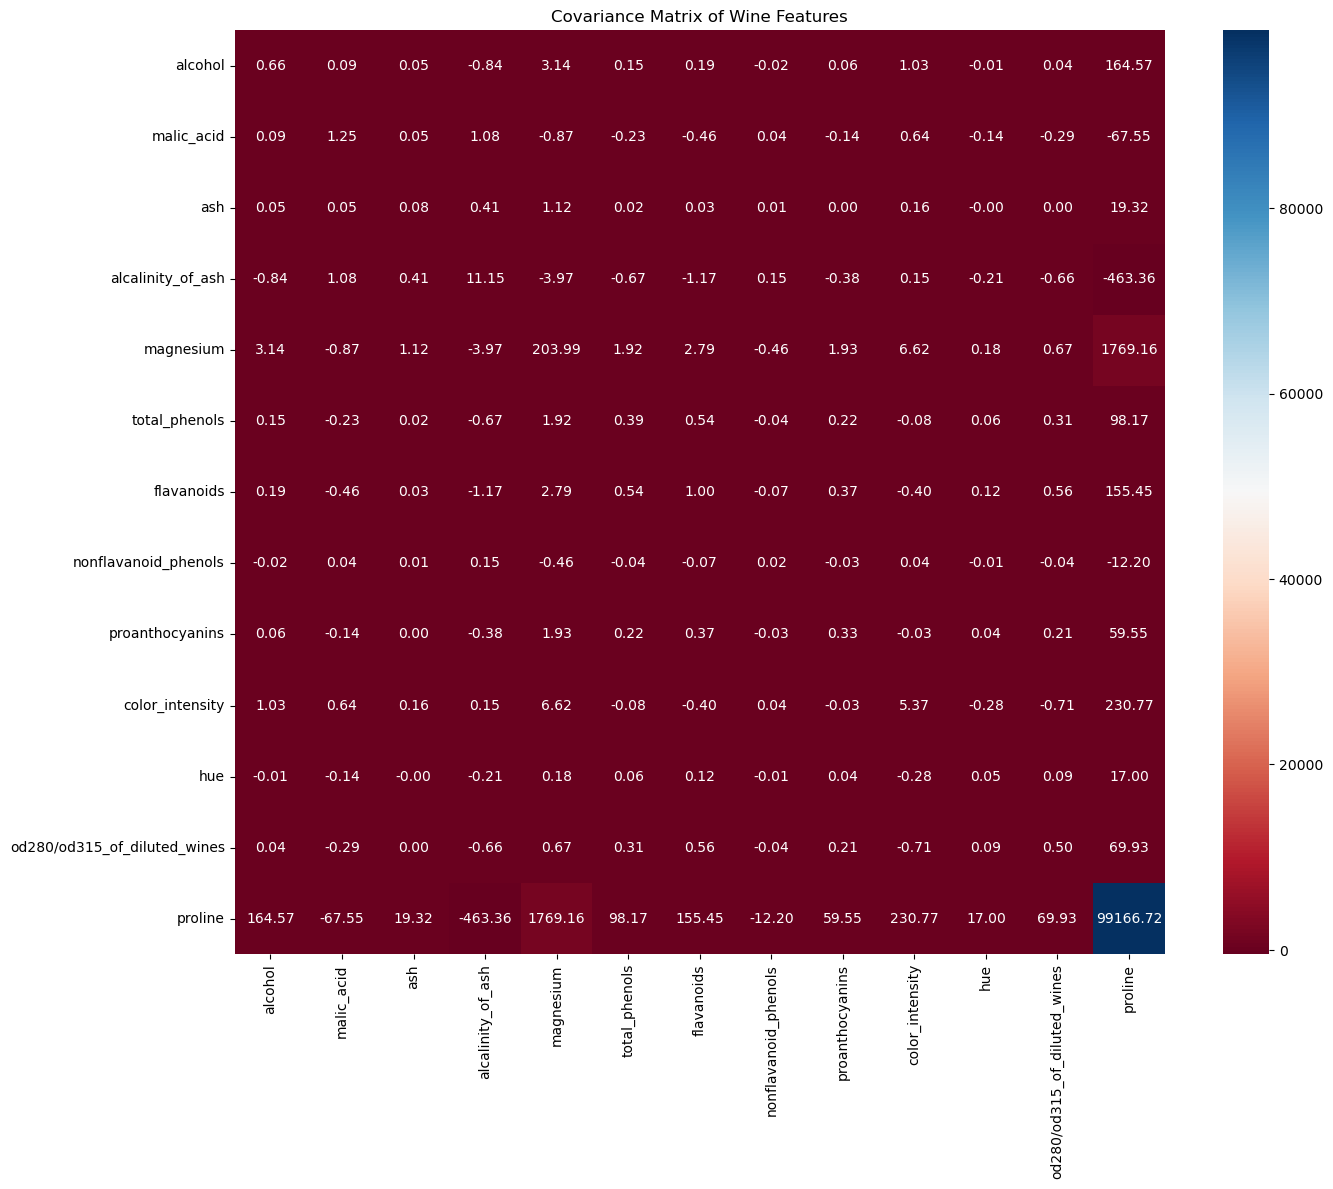

In [5]:
plt.figure(figsize=(15,12))
cov_matrix = df.drop(columns='target').cov()
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='RdBu')
plt.title("Covariance Matrix of Wine Features")
plt.show()

## 5. Data Scaling (Standardization)

In [7]:
scaler = StandardScaler()
features = df.drop(columns='target').columns
scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled, columns=features)
df_scaled['target'] = df['target']
df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16,0.938202
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,0.775035
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,0.000000
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,0.000000
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,1.000000
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,2.000000
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,2.000000


## 6. PCA: Show Better Class Separation

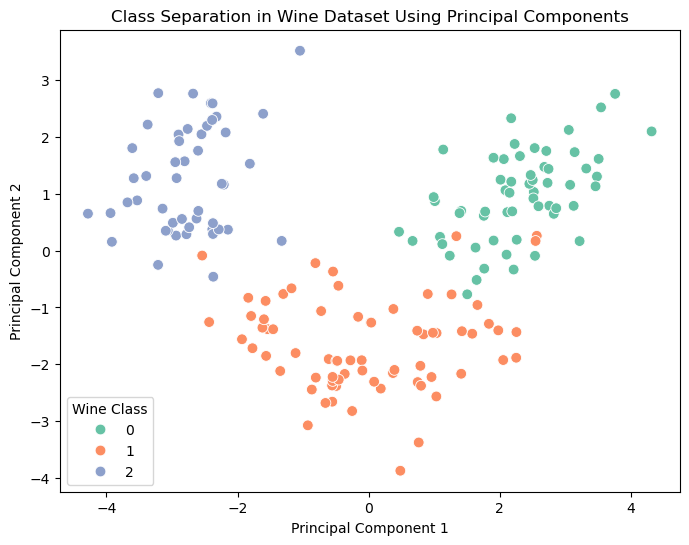

In [8]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
df_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='Set2', s=60)
plt.title('Class Separation in Wine Dataset Using Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Class')
plt.show()